# YOUTUBE APIs
This simple proect is meant to access my youtube channel and create a dataframe of all the videos in my channel. Also it will show the likes, comments and the number of views per video

In [213]:
# import the reuired keys
import requests
import pandas as pd

In [214]:
# This module contains a .py file that has my keys and channle id. You can replace yours with the exact values.
import keys
api_key = keys.api_key
channel_id = keys.channel_id

In [215]:
# make an API call

pageToken = ''
url = 'https://www.googleapis.com/youtube/v3/search?key='+api_key+'&channelId='+channel_id+'&part=snippet,id&order=date&maxResults=1000'+pageToken
response = requests.get(url).json()

In [216]:
# preview our response
response

{'kind': 'youtube#searchListResponse',
 'etag': 'a7xFXKu-0kLbzkbJWaxhK4ZEXcw',
 'regionCode': 'KE',
 'pageInfo': {'totalResults': 5, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'lz8QlgXxZqujmkzg_MNhXGGP8GY',
   'id': {'kind': 'youtube#video', 'videoId': '-GTMfs2K7AM'},
   'snippet': {'publishedAt': '2021-07-30T06:14:38Z',
    'channelId': 'UC_GmvyOJCwvw6_Co4WpZ39Q',
    'title': 'KMA Mtwapa Holiday Home',
    'description': 'Located in Mtwapa, KMA Mtwapa Holiday Home provides accommodations with a balcony and free WiFi. Located 2.1 mi from ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/-GTMfs2K7AM/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/-GTMfs2K7AM/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/-GTMfs2K7AM/hqdefault.jpg',
      'width': 480,
      'height': 360}},
    'channelTitle': 'Daniel Ekale',
    'liveBroadcas

In [217]:
def get_videos(api_key, response):
    ''' This function takes two arguments, the api_key and the response and generates a list of videos from that channel'''
    list_of_videos = [] # an empty list that will hold all the video details
    for video in response['items']:
        if video['id']['kind'] == 'youtube#video': # only choose videos 
            results = {
                    'Video ID' : video['id']['videoId'],
                    'Video Title' : str(video['snippet']['title']).replace("&amp;", ''),
                    'Publish Date' : str(video['snippet']['publishedAt']).split("T")[0]
                    }
            video_id = video['id']['videoId'] 
            url_stats = 'https://www.googleapis.com/youtube/v3/videos?id='+video_id+'&part=statistics&key='+api_key # second response for video stats
            response_video_stats = requests.get(url_stats).json()
            for stats in response_video_stats['items']:
                results['View Count'] = stats['statistics']['viewCount']
                results['Like Count'] = stats['statistics']['likeCount']
                results['Comment Count'] = stats['statistics']['commentCount']
            
                list_of_videos.append(results) # append to our list above
    return list_of_videos

In [218]:
# Create a pandas Data Frame from a list of all the videos
my_videos = get_videos(api_key, response)
df = pd.DataFrame(my_videos)
df.head()

,Video ID,Video Title,Publish Date,View Count,Like Count,Comment Count
0,-GTMfs2K7AM,KMA Mtwapa Holiday Home,2021-07-30,69,3,0
1,Qx8yeRhJmbg,The Thompson’s Falls,2021-01-01,11,2,0
2,x-gZZ_EQgoY,Funcity Recreational Centre Restaurant,2020-12-26,88,3,0
3,-0i9C9gcVdY,"Rental houses in Utawala, Nairobi.",2020-07-12,827,7,13


In [219]:
# To be able to use the View Count column Convert it from string to int
df['View Count'] = df['View Count'].astype(int)
df.sort_values(by='View Count', ascending=False)

,Video ID,Video Title,Publish Date,View Count,Like Count,Comment Count
3,-0i9C9gcVdY,"Rental houses in Utawala, Nairobi.",2020-07-12,827,7,13
2,x-gZZ_EQgoY,Funcity Recreational Centre Restaurant,2020-12-26,88,3,0
0,-GTMfs2K7AM,KMA Mtwapa Holiday Home,2021-07-30,69,3,0
1,Qx8yeRhJmbg,The Thompson’s Falls,2021-01-01,11,2,0


### The Top most watched videos plot

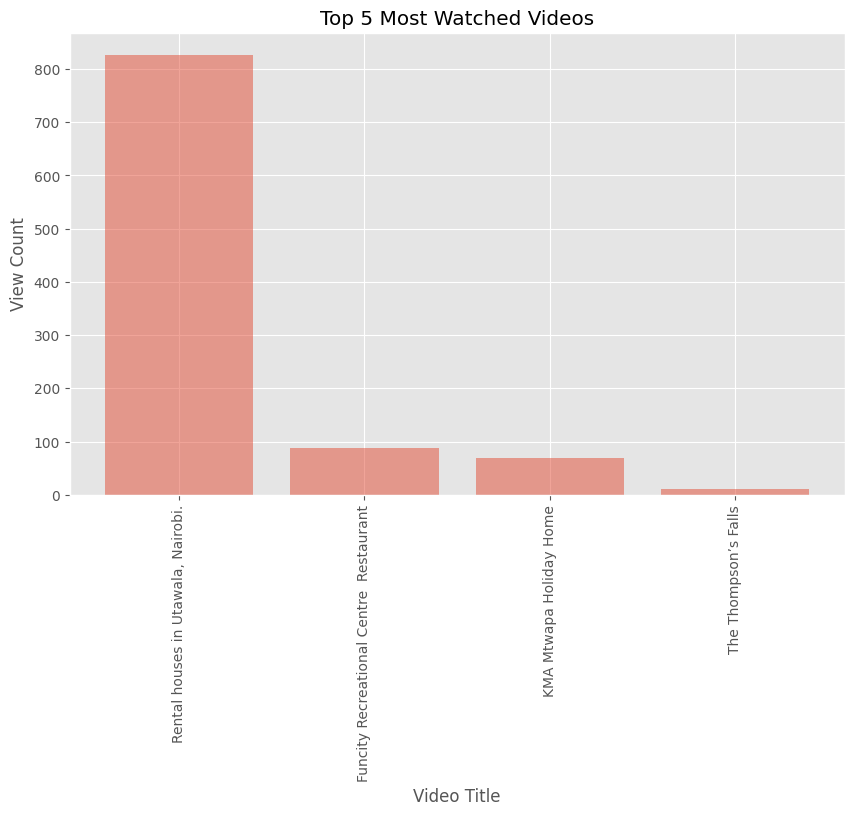

In [220]:
import matplotlib.pyplot as plt
# sort the dataframe by view count
df_sorted = df.sort_values(by='View Count', ascending=False)

# create a bar plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_sorted['Video Title'], df_sorted['View Count'], alpha=0.5)

# set x-axis label rotation
plt.xticks(rotation=90)

# set plot title and axis labels
plt.title('Top 5 Most Watched Videos')
plt.xlabel('Video Title')
plt.ylabel('View Count')

# display the plot
plt.show()

### Conclusion
The output shows the top 4 most viewed videos and their view count in descending order. The most viewed video is "Rental houses in Utawala, Nairobi" with 827 views followed by "Funcity Recreational Centre & Restaurant" with 88 views, "KMA Mtwapa Holiday Home" with 69 views, and "The Thompson’s Falls" with 11 views.